In [184]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## Задание 1. Создание кубика

Зададим вершины и грани кубика

In [365]:
def basic_cube():
    vertices = np.array([[-1 , 1 , 1 , -1 , -1 , 1 , 1 , -1],
                        [-1 , -1 , 1, 1 , -1 , -1 , 1 , 1],
                        [-1 , -1 , -1 , -1 , 1 , 1 , 1 , 1],
                        [1 , 1 , 1, 1 , 1 , 1 , 1 , 1]])

    faces = np.array([[1 , 2 , 6, 5],
                    [2 , 3 , 7, 6],
                    [3 , 4 , 8, 7],
                    [4 , 1 , 5, 8],
                    [1 , 2 , 3, 4],
                    [5 , 6 , 7, 8]])
    faces -= 1
    return (vertices, faces)

Функция построения куба

In [580]:
def plot_cubes(cubes, angles = (45, 45)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.axes.set_xlim3d(left=-2, right=4)
    ax.axes.set_ylim3d(bottom=-2, top=4) 
    ax.axes.set_zlim3d(bottom=-2, top=4) 
    ax.view_init(angles[0], angles[1])
    for cube in cubes:
        vertices, faces = cube[0], cube[1]
        verts = list(zip(*vertices[:3]))
        poly3d = [[verts[faces[ix][iy]] for iy in range(faces.shape[1])] for ix in range(faces.shape[0])]
        
        ax.scatter(*vertices[:3])
        ax.add_collection3d(Poly3DCollection(poly3d, linewidth = 0.1, edgecolor='black', alpha = 0.5))
    plt.show()

Наш кубик

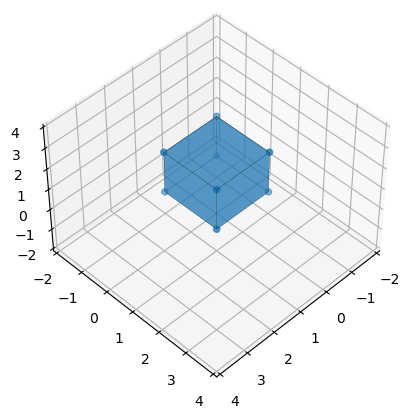

In [581]:
cube = basic_cube()
plot_cubes([cube])

Мы использовали 4-х компонентные векторы для задание вершин куба. Это так называемые однородные координаты. К привычным трем координатам xyz добавляем четвертую w = 1. Это облегчает запись преобразований пространства. Так в декартовых координатах вращение и масштабирование можно описать матрицей 3х3, однако смещение нельзя. В однородных координатах все три преобразования записываются как матрица 4х4 и реализуются через матричное умножение.

Мы можем задать фигуру любой формы, используя то, что в компьютерной графике называется полигональной сеткой

## Задание 2. Масштабирование

Матрица масштабирования

In [583]:
def scale(scale_x, scale_y, scale_z):
    return np.diag(np.array([scale_x, scale_y, scale_z, 1]))

Масштабируем исходный кубик

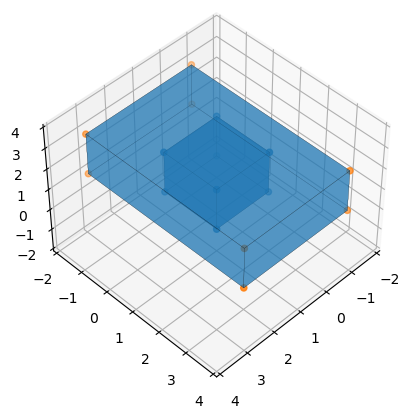

In [584]:
cube = basic_cube()
cube_scaled = (np.dot(scale(2, 3, 1), cube[0]), cube[1])
plot_cubes([cube, cube_scaled])

## Задание 3. Перемещение

Матрица перемещения

In [585]:
def translate(translate_x, translate_y, translate_z):
    return np.array([[1, 0, 0, translate_x],
                     [0, 1, 0, translate_y],
                     [0, 0, 1, translate_z],
                     [0, 0, 0, 1]])

Переместим исходный куб

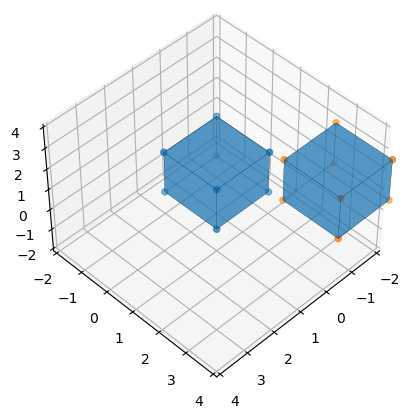

In [671]:
cube = basic_cube()
cube_translated = (np.dot(translate(-1.5, 3, 1), cube[0]), cube[1])
plot_cubes([cube, cube_translated])

Как видим, поряд комбинации масштабирования и перемещения не важен

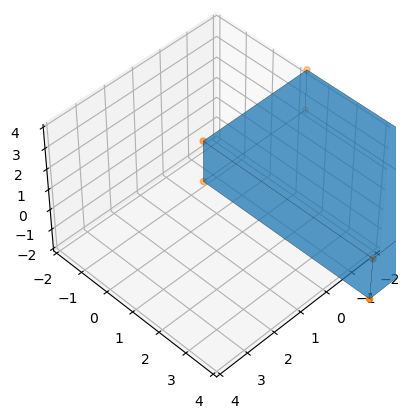

In [672]:
cube_translated_scaled =  (np.dot(scale(2, 3, 1), cube_translated[0]), cube_translated[1])
cube_scaled_translated = (np.dot(translate(-1.5, 3, 1), cube_scaled[0]), cube_scaled[1])
plot_cubes([cube_translated_scaled, cube_scaled_translated])

## Задание 4. Вращение

Поворот относительно Ох

In [591]:
def rotateX(theta):
    return np.array([[1, 0, 0, 0],
                   [0, np.cos(theta), -np.sin(theta), 0],
                   [0, np.sin(theta), np.cos(theta), 0],
                   [0, 0, 0, 1]])

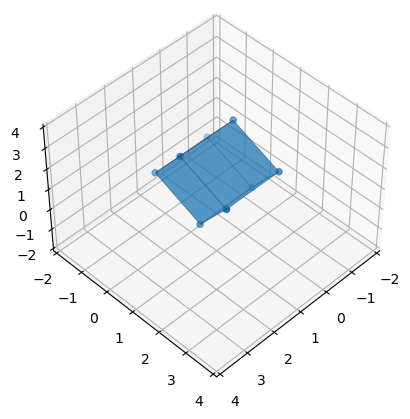

In [593]:
cube = basic_cube()
cube_rotated = (np.dot(rotateX(np.pi / 3), cube[0]), cube[1])
plot_cubes([cube_rotated])

Поворот относительно Оу

In [594]:
def rotateY(theta):
    return np.array([[np.cos(theta), 0, np.sin(theta), 0],
                   [0, 1, 0, 0],
                   [-np.sin(theta), 0, np.cos(theta), 0],
                   [0, 0, 0, 1]])

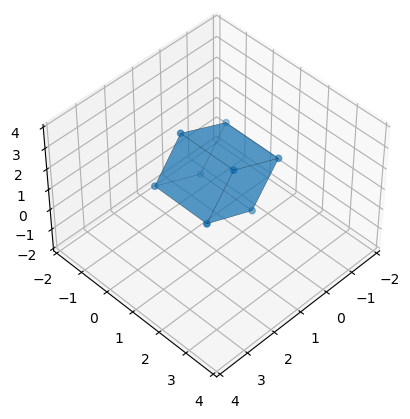

In [595]:
cube = basic_cube()
cube_rotated = (np.dot(rotateY(np.pi / 3), cube[0]), cube[1])
plot_cubes([cube_rotated])

Поворот относительно Оz

In [596]:
def rotateZ(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                   [np.sin(theta), np.cos(theta), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

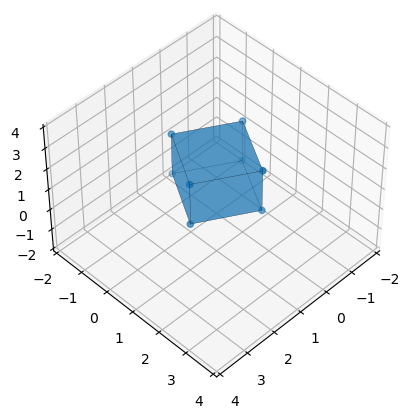

In [597]:
cube = basic_cube()
cube_rotated = (np.dot(rotateZ(np.pi / 3), cube[0]), cube[1])
plot_cubes([cube_rotated])

В 3D пространстве твердое тело обладает 6 степенями свободы: 3 поступательных и 3 вращательных

Матрицы поворота не коммутативны

## Задание 5. Вращение около одной вершины

Матрица вращения вокруг произвольной оси

In [606]:
def rotate(theta, v):
    v = v / np.linalg.norm(v)
    return np.array([[np.cos(theta) + v[0] ** 2 * (1 - np.cos(theta)), v[0] * v[1] * (1 - np.cos(theta)) - v[2] * np.sin(theta), v[0] * v[2] * (1 - np.cos(theta)) + v[1] * np.sin(theta), 0],
                    [v[0] * v[1] * (1 - np.cos(theta)) + v[2] * np.sin(theta), np.cos(theta) + v[1] ** 2 * (1 - np.cos(theta)), v[1] * v[2] * (1 - np.cos(theta)) - v[0] * np.sin(theta), 0],
                    [v[0] * v[2] * (1 - np.cos(theta)) - v[1] * np.sin(theta), v[1] * v[2] * (1 - np.cos(theta)) + v[0] * np.sin(theta), np.cos(theta) + v[2] ** 2 * (1 - np.cos(theta)), 0],
                    [0, 0, 0, 1]])

Повернем куб относительно одной вершины

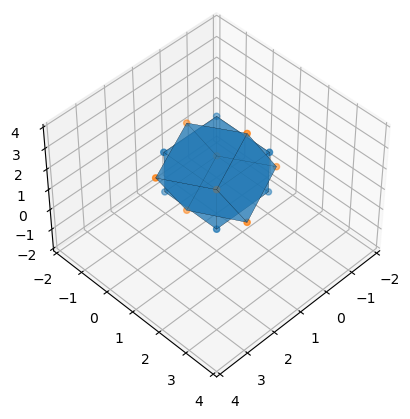

In [674]:
cube = basic_cube()
cube_rotated = (np.dot(rotate(np.pi / 6, np.array([1, 1, 1])), cube[0]), cube[1])
plot_cubes([cube, cube_rotated])


## Задание 6. Реализация камеры

Матрицы изменения положения матрицы

In [688]:
def camera(camera_position, camera_target, up_vector):
	vector = camera_target - camera_position
	vector = vector / np.linalg.norm(vector)

	vector2 = np.cross(up_vector, vector)
	vector2 = vector2 / np.linalg.norm(vector2)

	vector3 = np.cross(vector, vector2)
	return np.array([
		[vector2[0], vector3[0], vector[0], 0.0],
		[vector2[1], vector3[1], vector[1], 0.0],
		[vector2[2], vector3[2], vector[2], 0.0],
		[-np.dot(vector2, camera_position), -np.dot(vector3, camera_position), np.dot(vector, camera_position), 1.0]
	])

Разместим на сцене два кубика

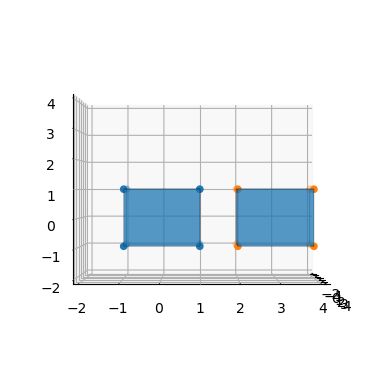

In [718]:
cube1 = basic_cube()
cube2 = (np.dot(translate(0, 3, 0), cube[0]), cube[1])
plot_cubes([cube1, cube2], (0, 0))

Изменим положение камеры

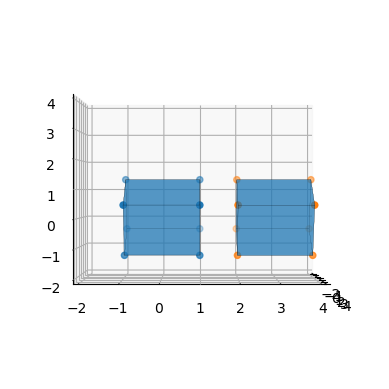

In [719]:
center = np.array([0.0, 0.0, 0.0])
target = np.array([0.5, 0, 1])
up = np.array([0.0, 1, 0])

cube1 = (np.dot(camera(center, target, up), cube1[0]), cube1[1])
cube2 = (np.dot(camera(center, target, up), cube2[0]), cube2[1])

plot_cubes([cube1, cube2], (0, 0))

## Задание 7. Реализация перспективы

Матрица изменения перспективы

In [715]:
def perspective(fov, near_plane, far_plane):
	return np.array([
		[1.0 / np.tan(fov / 2.0), 0.0, 0.0, 0.0],
		[0.0, 1.0 / np.tan(fov / 2.0), 0.0, 0.0],
		[0.0, 0.0, far_plane / (near_plane - far_plane), -1.0],
		[0.0, 0.0, (near_plane * far_plane) / (near_plane - far_plane), 0.0]
	])

Применим матрицу изменения перспективы

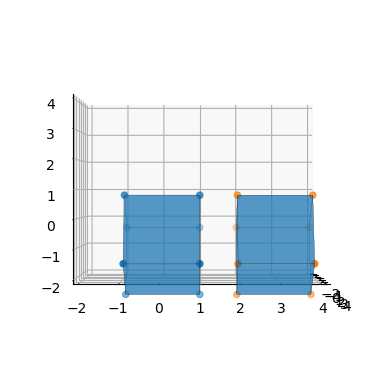

In [720]:
fov = np.pi / 2
near_plane = 0.1
far_plane = 0.4

cube1 = (np.dot(perspective(fov, near_plane, far_plane), cube1[0]), cube1[1])
cube2 = (np.dot(perspective(fov, near_plane, far_plane), cube2[0]), cube2[1])

plot_cubes([cube1, cube2], (0, 0))